## Deskripsi Masalah

Anggota kelompok 11:


*   Mayang Sari (1301194227)
*   Nida Umulhoir (1301190078)

        Classification (supervised learning) adalah memprediksi apakah
        pelanggan tertarik untuk membeli kendaraan baru atau tidak  berdasarkan data pelanggan
        di dealer.



In [ ]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# get the csv files
!gdown --id 1pJ8aETdr5Ov4DKGjg0NZHzD4ZwlJ2zYX
!gdown --id 19xklr09pmLoSw8SL-qMg9pINIGNLuTnc

Downloading...
From: https://drive.google.com/uc?id=1pJ8aETdr5Ov4DKGjg0NZHzD4ZwlJ2zYX
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 92.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=19xklr09pmLoSw8SL-qMg9pINIGNLuTnc
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 36.1MB/s]


In [ ]:
# Import data .csv
df_train = pd.read_csv('kendaraan_train.csv')
df_test = pd.read_csv('kendaraan_test.csv')

## Data Exploration and Preparation

In [ ]:
df_train.head() # 5 data teratas

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
df_train.corr() 

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


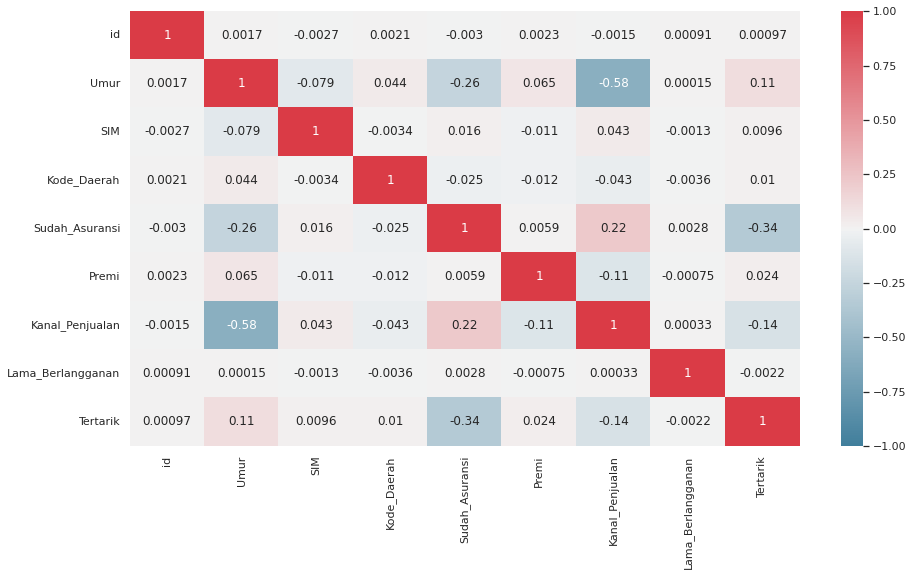

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
cmap = sns.diverging_palette(230, 10, as_cmap=True)
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)

In [ ]:
df_test.corr()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Umur,1.000000,-0.079814,0.039834,-0.248348,0.080981,-0.580755,-0.002231,0.110641
SIM,-0.079814,1.000000,0.002819,0.012309,-0.010366,0.048143,-0.003955,0.014286
Kode_Daerah,0.039834,0.002819,1.000000,-0.022219,-0.006858,-0.040408,-0.006635,0.014427
Sudah_Asuransi,-0.248348,0.012309,-0.022219,1.000000,0.000290,0.208369,-0.002667,-0.341085
Premi,0.080981,-0.010366,-0.006858,0.000290,1.000000,-0.124924,-0.005948,0.017309
Kanal_Penjualan,-0.580755,0.048143,-0.040408,0.208369,-0.124924,1.000000,-0.000375,-0.136827
Lama_Berlangganan,-0.002231,-0.003955,-0.006635,-0.002667,-0.005948,-0.000375,1.000000,0.006147
Tertarik,0.110641,0.014286,0.014427,-0.341085,0.017309,-0.136827,0.006147,1.000000


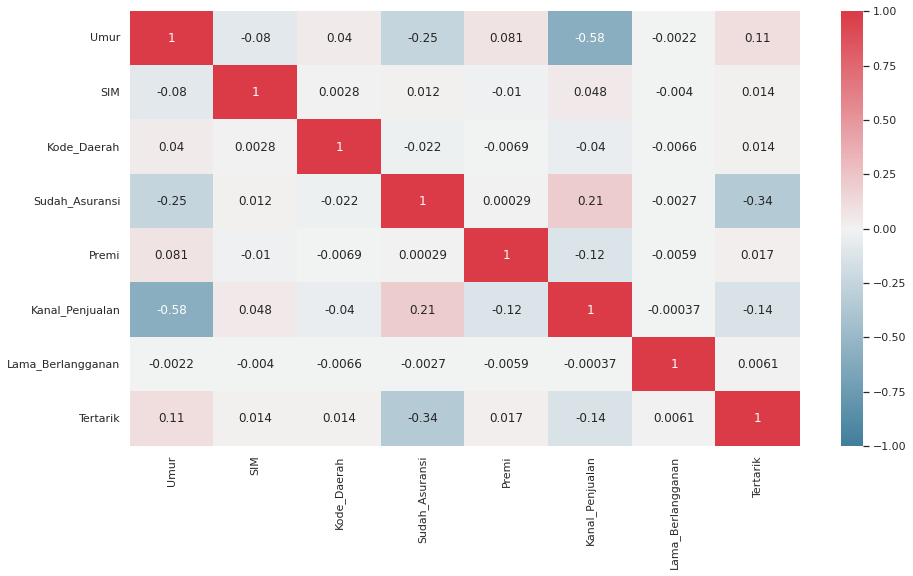

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
cmap = sns.diverging_palette(230, 10, as_cmap=True)
heatmap = sns.heatmap(df_test.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)

In [ ]:
df_train = df_train.drop(columns=['Jenis_Kelamin', 'SIM', 'Kode_Daerah', 'id'])
df_test = df_test.drop(columns=['Jenis_Kelamin', 'SIM', 'Kode_Daerah'])

In [ ]:
print('train shape:', df_train.shape) # ukuran baris dan kolom
print('test shape:',df_test.shape)

train shape: (285831, 8)
test shape: (47639, 8)


In [ ]:
# Untuk melihat info seperti type data, data non-null
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               271617 non-null  float64
 1   Sudah_Asuransi     271602 non-null  float64
 2   Umur_Kendaraan     271556 non-null  object 
 3   Kendaraan_Rusak    271643 non-null  object 
 4   Premi              271262 non-null  float64
 5   Kanal_Penjualan    271532 non-null  float64
 6   Lama_Berlangganan  271839 non-null  float64
 7   Tertarik           285831 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 17.4+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Umur               47639 non-null  int64 
 1   Sudah_Asuransi     47639 non-null  int64 
 2   Umur_Kendaraan     47639 non-null  object
 3   Kendaraan_Rusak    47639 non-null  object
 4   Premi              47639 non-null  int64 
 5   Kanal_Penjualan    47639 non-null  int64 
 6   Lama_Berlangganan  47639 non-null  int64 
 7   Tertarik           47639 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.9+ MB


In [ ]:
df_train.isna().sum() # cek nilai null 

Umur                 14214
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
df_test.isna().sum()

Umur                 0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# fill NaN values
# data numerik replace with mean
df_train[['Umur','Sudah_Asuransi','Premi','Kanal_Penjualan',
    'Lama_Berlangganan']] = df_train[['Umur','Sudah_Asuransi','Premi','Kanal_Penjualan',
    'Lama_Berlangganan']].fillna(value=df_train[['Umur','Sudah_Asuransi','Premi','Kanal_Penjualan',
    'Lama_Berlangganan']].mean())

# data kategorikal direplace dengan nilai modus
df_train['Umur_Kendaraan'].fillna(df_train['Umur_Kendaraan'].mode()[0], inplace=True)
df_train['Kendaraan_Rusak'].fillna(df_train['Kendaraan_Rusak'].mode()[0], inplace=True)

print('Check null after update:')
df_train.isna().sum()

Check null after update:


Umur                 0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
# change object dtype to float or int, kategorikal
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace({'Tidak': 0, 'Pernah': 1})
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace({'< 1 Tahun': 0, '1-2 Tahun': 1, '> 2 Tahun': 2})
df_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,30.0,1.0,0,0,28029.0,152.0,97.0,0
1,48.0,0.0,2,1,25800.0,29.0,158.0,0
2,21.0,1.0,0,0,32733.0,160.0,119.0,0
3,58.0,0.0,1,0,2630.0,124.0,63.0,0
4,50.0,0.0,2,1,34857.0,88.0,194.0,0


In [ ]:
# change object dtype to float or int, kategorikal
# kendaraan rusak = nominal, umur kendaraan = ordinal
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].replace({'Tidak': 0, 'Pernah': 1})
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace({'< 1 Tahun': 0, '1-2 Tahun': 1, '> 2 Tahun': 2})
df_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,49,0,1,1,46963,26,145,0
1,22,1,0,0,39624,152,241,0
2,24,1,0,0,110479,152,62,0
3,46,1,1,0,36266,124,34,0
4,35,0,1,1,26963,152,229,0


In [ ]:
# normalisasi untuk menyesuaikan data dalam rentang/range 0 -1, minmax 
def normalize(values):
    return (values - values.min())/(values.max() - values.min())

In [ ]:
df_train = df_train.apply(normalize)
df_train

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.153846,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,0.430769,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.015385,1.0,0.0,0.0,0.056002,0.981481,0.377163,0.0
3,0.584615,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
4,0.461538,0.0,1.0,1.0,0.059953,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...
285826,0.046154,1.0,0.0,0.0,0.043454,0.932099,0.716263,0.0
285827,0.015385,1.0,0.0,0.0,0.078239,0.932099,0.138408,0.0
285828,0.046154,1.0,0.0,0.0,0.087661,0.932099,0.747405,0.0
285829,0.738462,1.0,0.5,0.0,0.051853,0.759259,0.899654,0.0


In [ ]:
df_test = df_test.apply(normalize)
df_test

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.446154,0.0,0.5,1.0,0.082475,0.154321,0.467128,0.0
1,0.030769,1.0,0.0,0.0,0.068822,0.932099,0.799308,0.0
2,0.061538,1.0,0.0,0.0,0.200636,0.932099,0.179931,0.0
3,0.400000,1.0,0.5,0.0,0.062575,0.759259,0.083045,0.0
4,0.230769,0.0,0.5,1.0,0.045268,0.932099,0.757785,0.0
...,...,...,...,...,...,...,...,...
47634,0.630769,0.0,1.0,1.0,0.052851,0.759259,0.197232,0.0
47635,0.323077,0.0,0.5,1.0,0.000000,0.962963,0.768166,0.0
47636,0.061538,1.0,0.0,0.0,0.056687,0.932099,0.695502,0.0
47637,0.600000,0.0,0.5,1.0,0.065406,0.154321,0.792388,1.0


In [ ]:
df_train.duplicated().sum()

6385

In [ ]:
# drop duplicated data
df_train = df_train.drop_duplicates()
print("Data after dropping duplicate")
df_train.duplicated().sum()

Data after dropping duplicate


0

In [ ]:
df_test.duplicated().sum()

218

In [ ]:
# drop duplicated data
df_test = df_test.drop_duplicates()
print("Data after dropping duplicate")
df_test.duplicated().sum()

Data after dropping duplicate


0

In [ ]:
print('Data shape after dropping data')
print('train shape:', df_train.shape)
print('test shape:', df_test.shape)

Data shape after dropping data
train shape: (279446, 8)
test shape: (47421, 8)


In [ ]:
# copy data for experiment
df_train_exp = df_train.copy()
df_test_exp = df_test.copy()

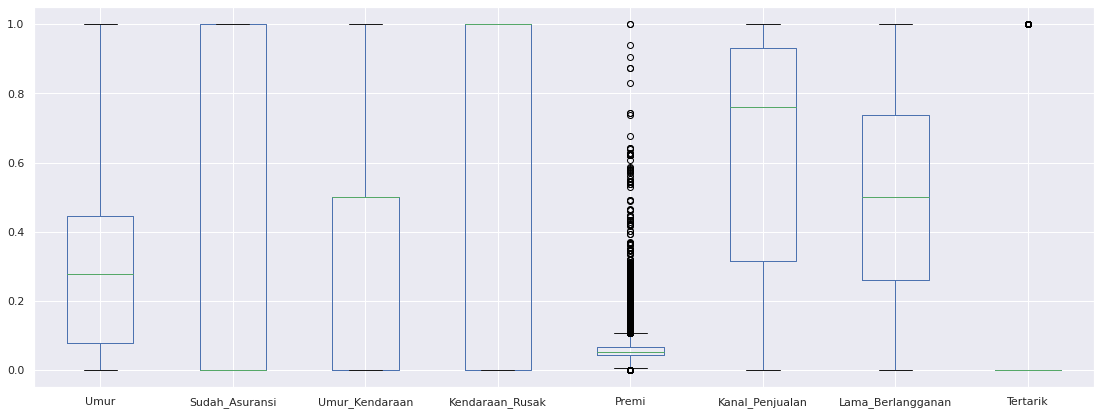

In [ ]:
# check outliers
df_train.plot(kind='box', figsize=(19,7))

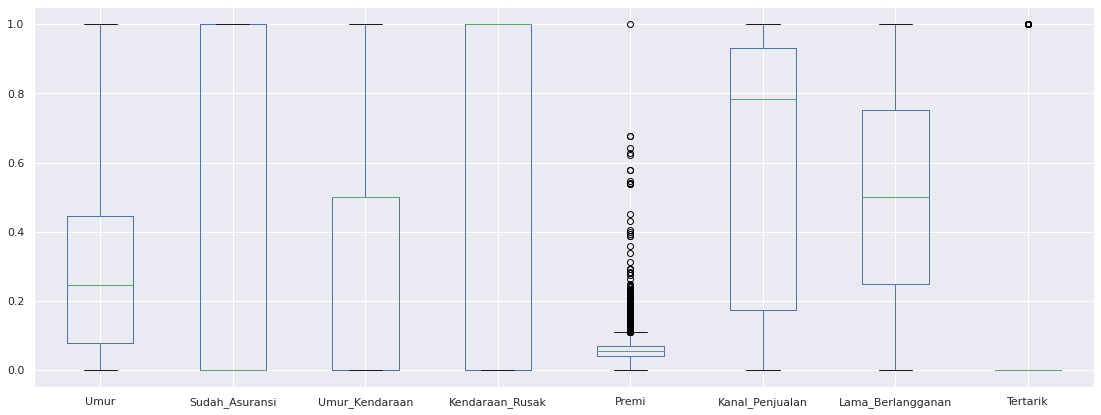

In [ ]:
df_test.plot(kind='box', figsize=(19,7))

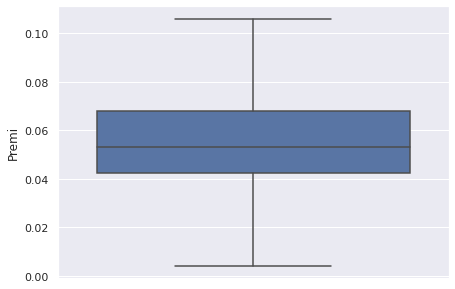

In [ ]:
# df_train
# remove outlier
# check and remove outliers
p25 = df_train['Premi'].quantile(0.25)
p75 = df_train['Premi'].quantile(0.75) # atas
iqr = p75 - p25
upper_bound = p75 + 1.5 * iqr
lowq_bound = p25 - 1.5 * iqr
# finding outliers
df_train[df_train['Premi'] > upper_bound]
df_train[df_train['Premi'] < lowq_bound]
# trimming(pangkas)
new_df = df_train[df_train['Premi'] < upper_bound]
# capping(batas)
new_df_cap_train = df_train.copy()
new_df_cap_train['Premi'] = np.where(new_df_cap_train['Premi'] > upper_bound,
                               upper_bound, np.where(new_df_cap_train['Premi'] < lowq_bound,
                                                     lowq_bound, new_df_cap_train['Premi']))
plt.figure(figsize=(7,5))
sns.boxplot(y='Premi', data=new_df_cap_train)
plt.show()

In [ ]:
new_df_cap_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.153846,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,0.430769,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.015385,1.0,0.0,0.0,0.056002,0.981481,0.377163,0.0
3,0.584615,0.0,0.5,0.0,0.004092,0.759259,0.183391,0.0
4,0.461538,0.0,1.0,1.0,0.059953,0.537037,0.636678,0.0


In [ ]:
df_train = new_df_cap_train.copy()
df_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.153846,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,0.430769,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.015385,1.0,0.0,0.0,0.056002,0.981481,0.377163,0.0
3,0.584615,0.0,0.5,0.0,0.004092,0.759259,0.183391,0.0
4,0.461538,0.0,1.0,1.0,0.059953,0.537037,0.636678,0.0


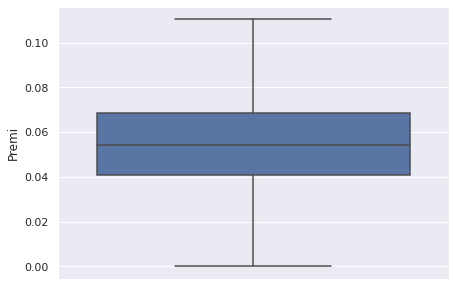

In [ ]:
# df_test
# check and remove outliers
p25 = df_test['Premi'].quantile(0.25)
p75 = df_test['Premi'].quantile(0.75) # atas
iqr = p75 - p25
upper_bound = p75 + 1.5 * iqr
lowq_bound = p25 - 1.5 * iqr
# finding outliers
df_test[df_test['Premi'] > upper_bound]
df_test[df_test['Premi'] < lowq_bound]
# trimming(pangkas)
new_df = df_test[df_test['Premi'] < upper_bound]
# capping(batas)
new_df_cap = df_test.copy()
new_df_cap['Premi'] = np.where(new_df_cap['Premi'] > upper_bound,
                               upper_bound, np.where(new_df_cap['Premi'] < lowq_bound,
                                                     lowq_bound, new_df_cap['Premi']))
# print(lowq_bound, upper_bound)
plt.figure(figsize=(7,5))
sns.boxplot(y='Premi', data=new_df_cap)
plt.show()

In [ ]:
new_df_cap.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.446154,0.0,0.5,1.0,0.082475,0.154321,0.467128,0.0
1,0.030769,1.0,0.0,0.0,0.068822,0.932099,0.799308,0.0
2,0.061538,1.0,0.0,0.0,0.110451,0.932099,0.179931,0.0
3,0.400000,1.0,0.5,0.0,0.062575,0.759259,0.083045,0.0
4,0.230769,0.0,0.5,1.0,0.045268,0.932099,0.757785,0.0


In [ ]:
df_test = new_df_cap.copy()
df_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.446154,0.0,0.5,1.0,0.082475,0.154321,0.467128,0.0
1,0.030769,1.0,0.0,0.0,0.068822,0.932099,0.799308,0.0
2,0.061538,1.0,0.0,0.0,0.110451,0.932099,0.179931,0.0
3,0.400000,1.0,0.5,0.0,0.062575,0.759259,0.083045,0.0
4,0.230769,0.0,0.5,1.0,0.045268,0.932099,0.757785,0.0


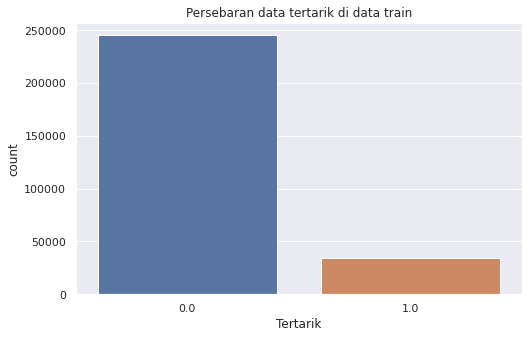

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Tertarik", data=df_train)
plt.title("Persebaran data tertarik di data train")
plt.show()

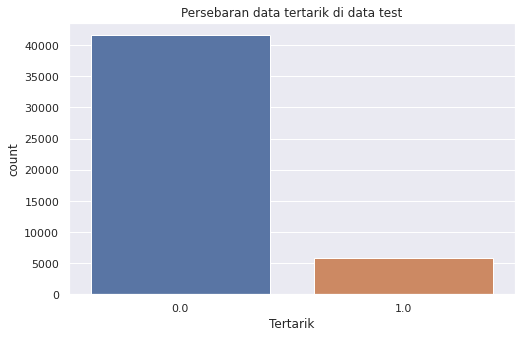

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Tertarik", data=df_test)
plt.title("Persebaran data tertarik di data test")
plt.show()

In [ ]:
# to csv : clean data
df_train.to_csv('kendaraan_train_clean.csv', index=False)

In [ ]:
# to csv : clean data
df_test.to_csv('kendaraan_test_clean.csv', index=False)

### Split data

In [ ]:
# split data
# X = semua fitur yang digunakan, y = label (tertarik)
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values

X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

In [ ]:
df_test.iloc[:,:-1]

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.446154,0.0,0.5,1.0,0.082475,0.154321,0.467128
1,0.030769,1.0,0.0,0.0,0.068822,0.932099,0.799308
2,0.061538,1.0,0.0,0.0,0.110451,0.932099,0.179931
3,0.400000,1.0,0.5,0.0,0.062575,0.759259,0.083045
4,0.230769,0.0,0.5,1.0,0.045268,0.932099,0.757785
...,...,...,...,...,...,...,...
47634,0.630769,0.0,1.0,1.0,0.052851,0.759259,0.197232
47635,0.323077,0.0,0.5,1.0,0.000000,0.962963,0.768166
47636,0.061538,1.0,0.0,0.0,0.056687,0.932099,0.695502
47637,0.600000,0.0,0.5,1.0,0.065406,0.154321,0.792388


# Pemodelan

In [ ]:
#Metrics
from sklearn.metrics import classification_report
# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix
# Import libarary Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Import Library Logistic Regression
from sklearn.linear_model import LogisticRegression
# Import library KNN
from sklearn.neighbors import KNeighborsClassifier
# decision tree
from sklearn.tree import DecisionTreeClassifier 


### 1. Gaussian Naive Bayes

In [ ]:
# Create Gaussian NB object
gaussian = GaussianNB()
# Train Gaussian NB
gaussian.fit(X_train, y_train)
#Predict the response for test dataset
Y_pred = gaussian.predict(X_test) 
#CM for Gaussian NB
cm = confusion_matrix(y_test,Y_pred)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,Y_pred)
accuracy_nb=round(accuracy*100, 2)
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.5f' %accuracy)
print('\nClassification report \n', classification_report(y_test, Y_pred, digits=5))

Confusion matrix for Naive Bayes
 [[28335 13231]
 [  644  5211]]
accuracy_Naive Bayes: 0.70741

Classification report 
               precision    recall  f1-score   support

         0.0    0.97778   0.68169   0.80332     41566
         1.0    0.28256   0.89001   0.42894      5855

    accuracy                        0.70741     47421
   macro avg    0.63017   0.78585   0.61613     47421
weighted avg    0.89194   0.70741   0.75709     47421



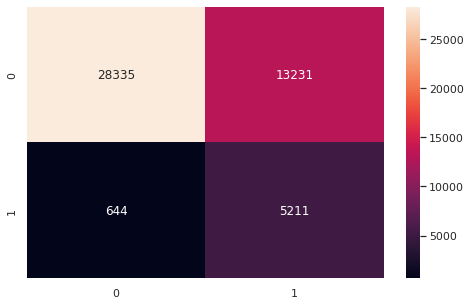

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.show()

### 2. Logistic Regression

      dependent variable = 'Tertarik'
      independent variable = fitur lain yang digunakan

In [ ]:
# logistic regression
# Create LogReg object
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
# Train LogReg
logreg.fit(X_train, y_train)
#Predict the response for test dataset
Y_pred = logreg.predict(X_test)
# CM for LogReg
cm = confusion_matrix(y_test, Y_pred)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,Y_pred)
accuracy_lr=round(accuracy*100, 2)
print('Confusion matrix for Logistic Regression\n', cm)
print('\nAccuracy_Logistic Regression : %.5f' %accuracy)
print('\nClassification report \n', classification_report(y_test, Y_pred, digits=5))

Confusion matrix for Logistic Regression
 [[41547    19]
 [ 5847     8]]

Accuracy_Logistic Regression : 0.87630

Classification report 
               precision    recall  f1-score   support

         0.0    0.87663   0.99954   0.93406     41566
         1.0    0.29630   0.00137   0.00272      5855

    accuracy                        0.87630     47421
   macro avg    0.58646   0.50045   0.46839     47421
weighted avg    0.80498   0.87630   0.81907     47421



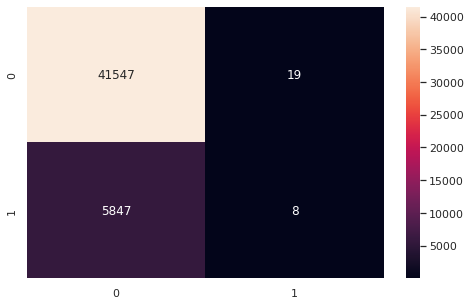

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.show()

### 3. K-Nearest Neighbor

In [ ]:
# KNN
# Create KNN object
knn = KNeighborsClassifier(n_neighbors = 4)
# Train KNN Classifer
knn.fit(X_train, y_train)
#Predict the response for test dataset
Y_pred = knn.predict(X_test) # menggunakan model untuk memprediksi data X-test
# CM for KNN
cm = confusion_matrix(y_test,Y_pred)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,Y_pred)
accuracy_knn=round(accuracy*100, 2)
print('Confusion matrix for KNN\n',cm)
print('\nAccuracy_KNN : %.3f' %accuracy)
print('\nClassification report \n', classification_report(y_test, Y_pred, digits=5))

Confusion matrix for KNN
 [[40503  1063]
 [ 5316   539]]

Accuracy_KNN : 0.865

Classification report 
               precision    recall  f1-score   support

         0.0    0.88398   0.97443   0.92700     41566
         1.0    0.33645   0.09206   0.14456      5855

    accuracy                        0.86548     47421
   macro avg    0.61022   0.53324   0.53578     47421
weighted avg    0.81638   0.86548   0.83039     47421



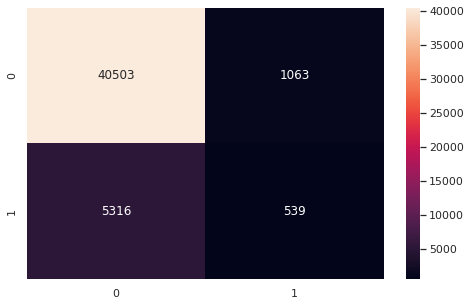

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.show()

### 4. Random Forest

In [ ]:
# random forest 
# Create RF object
random_forest = RandomForestClassifier(n_estimators=100)
# Train Decision Tree Classifer
random_forest.fit(X_train, y_train)
#Predict the response for test dataset
Y_prediction = random_forest.predict(X_test)
cm = confusion_matrix(y_test,Y_prediction)
print('Confusion matrix for Random Forest\n',cm)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,Y_prediction)
accuracy_rf=round(accuracy*100, 2)
print('\nAccuracy Random Forest : %.3f' %accuracy)
print('\nClassification report \n', classification_report(y_test, Y_prediction, digits=5))

Confusion matrix for Random Forest
 [[39805  1761]
 [ 4969   886]]

Accuracy Random Forest : 0.858

Classification report 
               precision    recall  f1-score   support

         0.0    0.88902   0.95763   0.92205     41566
         1.0    0.33472   0.15132   0.20842      5855

    accuracy                        0.85808     47421
   macro avg    0.61187   0.55448   0.56524     47421
weighted avg    0.82058   0.85808   0.83394     47421



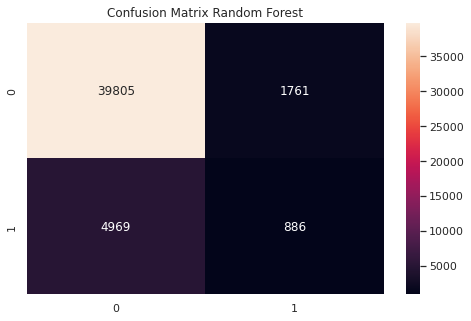

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.title('Confusion Matrix Random Forest')
plt.show()

### 5. Decision Tree

In [ ]:
# Decision Tree
# Create Decision Tree classifer object
dct = DecisionTreeClassifier()

# Train Decision Tree Classifer
dct = dct.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dct.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix forDecision Tree\n',cm)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
accuracy_dct = round(accuracy*100,2)
print('\nAccuracy Decision Tree: %.5f'%accuracy)
print('\nClassification report \n', classification_report(y_test, y_pred, digits=2))


Accuracy Decision Tree: 0.82579

Classification report 
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     41566
         1.0       0.30      0.31      0.30      5855

    accuracy                           0.83     47421
   macro avg       0.60      0.60      0.60     47421
weighted avg       0.83      0.83      0.83     47421



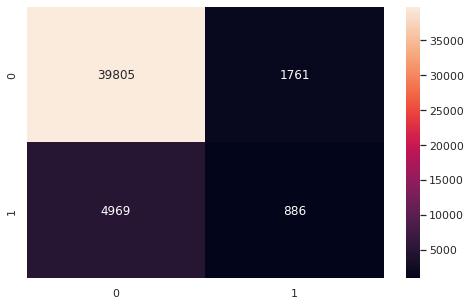

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.show()

# Evaluasi

In [ ]:
# evaluasi
eval = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest'],

    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_dct,
                      accuracy_rf
                     ]})
eval_df = eval.sort_values(by='Accuracy_score', ascending=False)
eval_df = eval_df.reset_index(drop=True)
eval_df

,Model,Accuracy_score
0,Logistic Regression,87.63
1,KNN,86.55
2,Random Forest,85.81
3,Decision Tree,82.58
4,Naive Bayes,70.74


# Eksperimen

### Data exploration and preparation

In [ ]:
# Data exploration tanpa handling outlier
df_train_exp

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.153846,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,0.430769,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.015385,1.0,0.0,0.0,0.056002,0.981481,0.377163,0.0
3,0.584615,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
4,0.461538,0.0,1.0,1.0,0.059953,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...
285826,0.046154,1.0,0.0,0.0,0.043454,0.932099,0.716263,0.0
285827,0.015385,1.0,0.0,0.0,0.078239,0.932099,0.138408,0.0
285828,0.046154,1.0,0.0,0.0,0.087661,0.932099,0.747405,0.0
285829,0.738462,1.0,0.5,0.0,0.051853,0.759259,0.899654,0.0


In [ ]:
df_test_exp

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.446154,0.0,0.5,1.0,0.082475,0.154321,0.467128,0.0
1,0.030769,1.0,0.0,0.0,0.068822,0.932099,0.799308,0.0
2,0.061538,1.0,0.0,0.0,0.200636,0.932099,0.179931,0.0
3,0.400000,1.0,0.5,0.0,0.062575,0.759259,0.083045,0.0
4,0.230769,0.0,0.5,1.0,0.045268,0.932099,0.757785,0.0
...,...,...,...,...,...,...,...,...
47634,0.630769,0.0,1.0,1.0,0.052851,0.759259,0.197232,0.0
47635,0.323077,0.0,0.5,1.0,0.000000,0.962963,0.768166,0.0
47636,0.061538,1.0,0.0,0.0,0.056687,0.932099,0.695502,0.0
47637,0.600000,0.0,0.5,1.0,0.065406,0.154321,0.792388,1.0


In [ ]:
# split data
# X = semua fitur yang digunakan, y = label (tertarik)
X_train = df_train_exp.iloc[:,:-1].values
y_train = df_train_exp.iloc[:,-1].values

X_test = df_test_exp.iloc[:,:-1].values
y_test = df_test_exp.iloc[:,-1].values

### Pemodelan

### 1. Gaussian Naive Bayes

In [ ]:
# Create Gaussian NB object
gaussian = GaussianNB()
# Train Gaussian NB
gaussian.fit(X_train, y_train)
#Predict the response for test dataset
Y_pred = gaussian.predict(X_test) 
# CM for Gaussian NB
cm = confusion_matrix(y_test,Y_pred)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,Y_pred)
accuracy_nb=round(accuracy*100, 2)
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.5f' %accuracy)
print('\nClassification report \n', classification_report(y_test, Y_pred, digits=5))

Confusion matrix for Naive Bayes
 [[28372 13194]
 [  648  5207]]
accuracy_Naive Bayes: 0.70810

Classification report 
               precision    recall  f1-score   support

         0.0    0.97767   0.68258   0.80390     41566
         1.0    0.28297   0.88933   0.42934      5855

    accuracy                        0.70810     47421
   macro avg    0.63032   0.78595   0.61662     47421
weighted avg    0.89190   0.70810   0.75765     47421



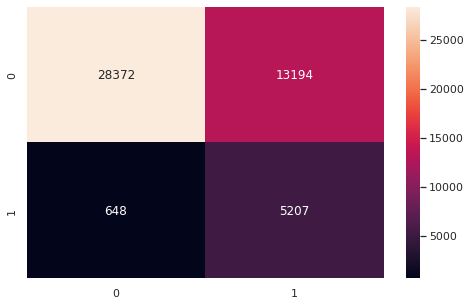

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.show()

### 2. Logistic Regression

In [ ]:
# logistic regression
# Create LogReg object
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
# Train LogReg
logreg.fit(X_train, y_train)
#Predict the response for test dataset
Y_pred = logreg.predict(X_test)
# CM for LogReg
cm = confusion_matrix(y_test, Y_pred)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,Y_pred)
accuracy_lr=round(accuracy*100, 2)
print('Confusion matrix for Logistic Regression\n', cm)
print('\nAccuracy_Logistic Regression : %.5f' %accuracy)
print('\nClassification report \n', classification_report(y_test, Y_pred, digits=5))

Confusion matrix for Logistic Regression
 [[41548    18]
 [ 5846     9]]

Accuracy_Logistic Regression : 0.87634

Classification report 
               precision    recall  f1-score   support

         0.0    0.87665   0.99957   0.93408     41566
         1.0    0.33333   0.00154   0.00306      5855

    accuracy                        0.87634     47421
   macro avg    0.60499   0.50055   0.46857     47421
weighted avg    0.80957   0.87634   0.81913     47421



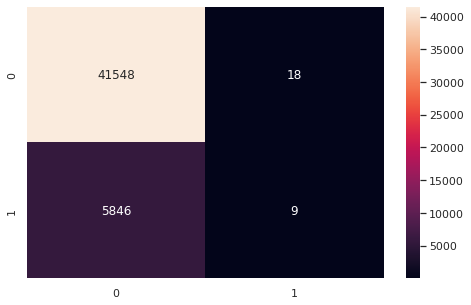

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.show()

### 3. K-Nearest Neighbor

In [ ]:
# KNN
# Create KNN object
knn = KNeighborsClassifier(n_neighbors = 4)
# Train KNN Classifer
knn.fit(X_train, y_train)
#Predict the response for test dataset
Y_pred = knn.predict(X_test) # menggunakan model untuk memprediksi data X-test
# CM for KNN
cm = confusion_matrix(y_test,Y_pred)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,Y_pred)
accuracy_knn=round(accuracy*100, 2)
print('Confusion matrix for KNN\n',cm)
print('\nAccuracy_KNN : %.5f' %accuracy)
print('\nClassification report \n', classification_report(y_test, Y_pred, digits=5))

Confusion matrix for KNN
 [[40527  1039]
 [ 5314   541]]

Accuracy_KNN : 0.866

Classification report 
               precision    recall  f1-score   support

         0.0    0.88408   0.97500   0.92732     41566
         1.0    0.34241   0.09240   0.14553      5855

    accuracy                        0.86603     47421
   macro avg    0.61324   0.53370   0.53642     47421
weighted avg    0.81720   0.86603   0.83079     47421



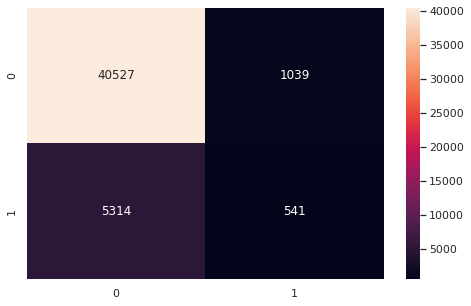

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.show()

### 4. Random Forest

In [ ]:
# random forest 
# Create RF object
random_forest = RandomForestClassifier(n_estimators=100)
# Train RF Classifier
random_forest.fit(X_train, y_train)
#Predict the response for test dataset
Y_prediction = random_forest.predict(X_test)
# CM for RF
cm = confusion_matrix(y_test,Y_prediction)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test,Y_prediction)
accuracy_rf=round(accuracy*100, 2)
print('Confusion matrix for Random Forest\n',cm)
print('\nAccuracy Random Forest : %.3f' %accuracy)
print('\nClassification report \n', classification_report(y_test, Y_prediction, digits=5))

Confusion matrix for Random Forest
 [[39795  1771]
 [ 4974   881]]

Accuracy Random Forest : 0.858

Classification report 
               precision    recall  f1-score   support

         0.0    0.88890   0.95739   0.92187     41566
         1.0    0.33220   0.15047   0.20712      5855

    accuracy                        0.85776     47421
   macro avg    0.61055   0.55393   0.56450     47421
weighted avg    0.82016   0.85776   0.83362     47421



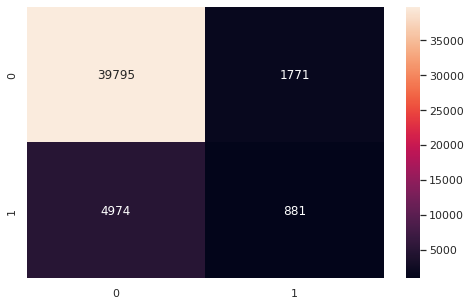

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.show()

### 5. Decision Tree

In [ ]:
# Decision Tree
# Create Decision Tree classifer object
dct = DecisionTreeClassifier()

# Train Decision Tree Classifer
dct = dct.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dct.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix forDecision Tree\n',cm)
# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
accuracy_dct = round(accuracy*100,2)
print('\nAccuracy Decision Tree: %.5f'%accuracy)
print('\nClassification report \n', classification_report(y_test, y_pred, digits=2))


Accuracy Decision Tree: 0.82626

Classification report 
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     41566
         1.0       0.30      0.31      0.30      5855

    accuracy                           0.83     47421
   macro avg       0.60      0.60      0.60     47421
weighted avg       0.83      0.83      0.83     47421



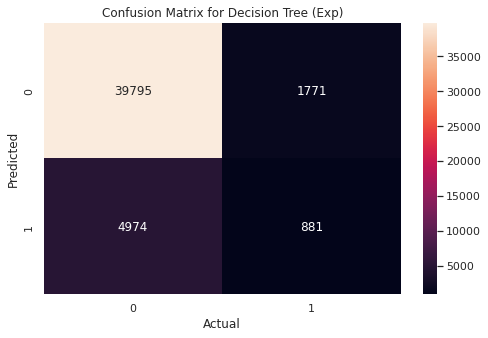

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax)
plt.title('Confusion Matrix for Decision Tree (Exp)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# evaluasi hasil experimen
eval = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest'],

    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_dct,
                      accuracy_rf
                     ]})
eval_df = eval.sort_values(by='Accuracy_score', ascending=False)
eval_df = eval_df.reset_index(drop=True)
eval_df

,Model,Accuracy_score
0,Logistic Regression,87.63
1,KNN,86.60
2,Random Forest,85.78
3,Decision Tree,82.63
4,Naive Bayes,70.81


### Kesimpulan 
Terdapat algoritma yang memiliki akurasi lebih tinggi di eksperimen, namun perbedaannya tidak terlalu jauh. Terdapat juga algoritma yang memiliki akurasi lebih tinggi pada saat pemodelan di awal yaitu Random Forest.